Epoch 1/50
37/37 [==============================] - 2s 15ms/step - loss: 0.0407 - val_loss: 0.0022
Epoch 2/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 3/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 9.8619e-04
Epoch 4/50
37/37 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 9.4885e-04
Epoch 5/50
37/37 [==============================] - 0s 7ms/step - loss: 9.7231e-04 - val_loss: 7.7027e-04
Epoch 6/50
37/37 [==============================] - 0s 7ms/step - loss: 8.9636e-04 - val_loss: 8.0648e-04
Epoch 7/50
37/37 [==============================] - 0s 7ms/step - loss: 8.6985e-04 - val_loss: 7.1184e-04
Epoch 8/50
37/37 [==============================] - 0s 7ms/step - loss: 8.9417e-04 - val_loss: 7.4493e-04
Epoch 9/50
37/37 [==============================] - 0s 7ms/step - loss: 8.1171e-04 - val_loss: 6.8487e-04
Epoch 10/50
37/37 [==============================] - 0s 7ms/step - lo

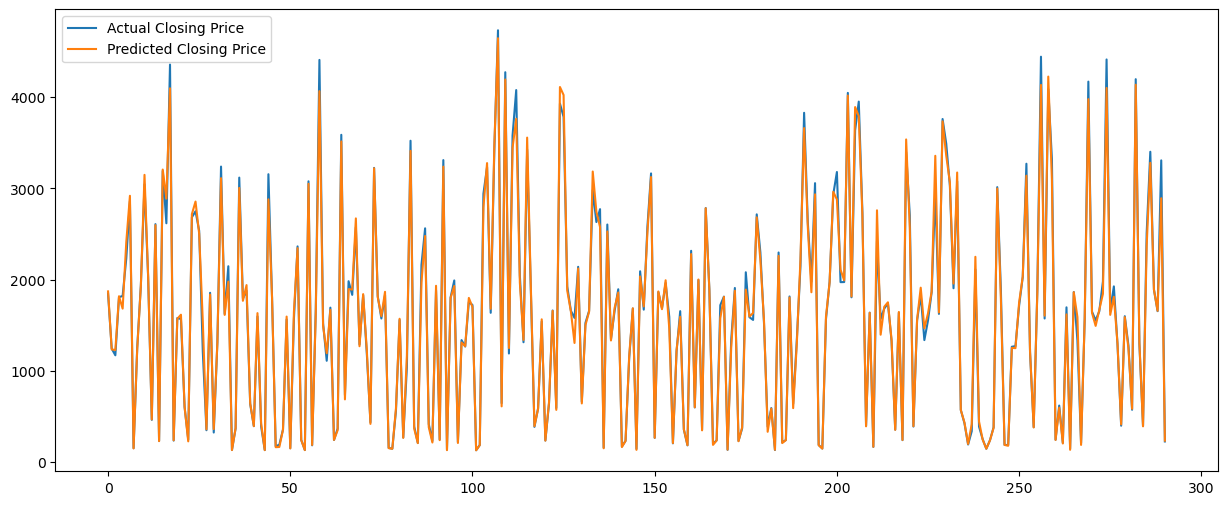

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
# Replace 'your_data_file.csv' with the actual file path or URL of your dataset
df = pd.read_csv('ETH-USD.csv')

# Data preprocessing
# Assuming the dataset has a column named 'close' for closing prices
data = df[['Close']].values.astype(float)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for time series prediction
sequence_length = 10  # You can adjust this based on your preference
X, y = [], []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    target = scaled_data[i+sequence_length:i+sequence_length+1]
    X.append(seq)
    y.append(target)

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Flatten y_test and y_pred before calculating mean squared error
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Calculate mean squared error
mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error: {mse}')

# Evaluate the model
y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# Inverse transform the predictions to get the actual closing prices
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results if needed
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label='Actual Closing Price')
plt.plot(y_pred_actual, label='Predicted Closing Price')
plt.legend()
plt.show()
